# **Implementação da Deep Learning para o TCC**

## 1.  Configurações iniciais

Montagem do drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Importação de módulos 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2.  Leitura dos dados

In [3]:
analise = pd.read_csv('/content/gdrive/MyDrive/TCC/analise.csv')

In [4]:
analise.shape

(159, 262)

In [5]:
analise = analise.drop(['Unnamed: 0'], axis=1)

In [6]:
analise

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,gamma_l,gamma_h,c,d0,arquivo
0,1.0,0.05,0.45,0.27,0.06,0.07,0.08,0.10,0.09,0.08,0.08,0.07,0.06,0.07,0.08,0.08,0.08,0.07,0.06,0.06,0.07,0.07,0.07,0.06,0.06,0.05,0.06,0.06,0.07,0.06,0.06,0.06,0.07,0.08,0.09,0.09,0.11,0.10,0.10,0.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.13,1.8,1.8,317,rx - 121.png
1,0.0,0.00,0.00,0.00,0.00,0.00,0.23,0.43,0.62,1.00,0.65,0.18,0.07,0.08,0.07,0.08,0.07,0.08,0.07,0.08,0.08,0.10,0.10,0.09,0.08,0.10,0.09,0.10,0.09,0.10,0.10,0.11,0.12,0.14,0.13,0.13,0.13,0.14,0.13,0.14,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.26,2.8,2.0,379,rx - 122.png
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.22,0.31,0.40,0.47,0.40,0.30,0.21,0.18,0.23,0.21,0.16,0.11,0.12,0.12,0.12,0.12,0.11,0.10,0.10,0.09,0.09,0.11,0.12,0.10,0.09,0.10,0.09,0.10,0.10,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.07,2.6,1.0,509,rx - 123.png
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.42,0.24,0.25,0.32,0.31,0.30,0.23,0.19,0.27,0.29,0.21,0.10,0.10,0.10,0.09,0.08,0.08,0.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.14,2.5,1.1,523,rx - 125.png
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.42,0.24,0.25,0.32,0.31,0.30,0.23,0.19,0.27,0.29,0.21,0.10,0.10,0.10,0.09,0.08,0.08,0.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.14,2.5,1.1,523,rx - 125.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.01,0.03,0.07,0.14,0.17,0.15,0.19,0.22,0.24,0.29,0.27,0.29,0.25,0.23,0.23,0.24,0.25,0.27,0.28,0.31,0.31,0.34,0.32,0.32,0.33,0.32,0.26,0.24,0.19,0.19,0.18,0.18,0.20,0.20,0.20,0.21,0.22,0.23,0.25,...,0.72,0.81,0.91,0.87,0.86,0.84,0.80,0.83,0.83,0.78,0.72,0.67,0.65,0.71,0.74,0.87,0.78,0.77,0.62,0.63,0.58,0.52,0.50,0.44,0.37,0.35,0.37,0.39,0.39,0.37,0.28,0.23,0.12,0.09,0.0,0.01,2.2,0.1,57,rx - 27.png
155,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.13,0.36,0.48,0.35,0.16,0.11,0.08,0.08,0.11,0.11,0.11,0.18,0.27,0.40,0.45,0.40,0.30,0.25,0.20,0.20,0.19,0.17,0.16,0.14,0.15,0.14,0.14,0.13,0.13,0.13,0.12,0.12,...,0.51,0.51,0.53,0.49,0.46,0.44,0.45,0.45,0.48,0.48,0.54,0.49,0.47,0.46,0.47,0.42,0.42,0.44,0.41,0.37,0.36,0.42,0.41,0.35,0.33,0.30,0.35,0.30,0.39,0.23,0.24,0.29,0.42,0.14,0.0,0.01,3.2,0.3,38,rx - 28.png
156,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.04,0.12,0.28,0.49,0.78,0.98,1.00,0.94,0.82,0.79,0.74,0.75,0.76,0.80,0.85,0.76,0.65,0.48,0.37,0.31,0.23,0.19,0.15,0.13,0.12,0.12,0.10,0.11,0.11,0.10,...,0.39,0.44,0.48,0.42,0.42,0.41,0.39,0.39,0.38,0.36,0.33,0.34,0.31,0.34,0.34,0.36,0.33,0.27,0.25,0.24,0.23,0.24,0.26,0.26,0.22,0.24,0.23,0.21,0.18,0.15,0.13,0.10,0.03,0.01,0.0,0.01,2.2,0.1,136,rx - 29.png
157,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.04,0.11,0.21,0.40,0.64,0.82,0.86,0.71,0.53,0.

In [7]:
histogramas = analise.iloc[0:150, 0:256].values
parametros = analise.iloc[0:150, 256:260].values
arq_train_test = analise['arquivo'][0:150]
histogramas_real = analise.iloc[151:, 0:256].values
parametros_real = analise.iloc[151:, 256:260]
arq_real = analise['arquivo'][151:]
parametros.shape

(150, 4)

In [8]:
histogramas_real

array([[0.  , 0.  , 0.  , ..., 0.26, 0.41, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.04, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.03, 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.19, 0.48, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.46, 0.08, 0.  ]])

In [9]:
parametros_real

,gamma_l,gamma_h,c,d0
151,0.01,2.6,0.2,149
152,0.02,2.7,0.1,145
153,0.01,2.9,0.3,68
154,0.01,2.2,0.1,57
155,0.01,3.2,0.3,38
156,0.01,2.2,0.1,136
157,0.01,2.9,0.2,68
158,0.01,2.6,0.7,75


In [ ]:
arq_real

151    rx - 23.png
152    rx - 24.png
153    rx - 26.png
154    rx - 27.png
155    rx - 28.png
156    rx - 29.png
157    rx - 30.png
158    rx - 31.png
Name: arquivo, dtype: object

In [10]:
gammaL = analise['gamma_l'][0:150].values
gammaL_av = analise['gamma_l'][151:].values

gammaH = analise['gamma_h'][0:150].values
gammaH_av = analise['gamma_h'][151:].values

c = analise['c'][0:150].values
c_av = analise['c'][151:].values

d0 = analise['d0'][0:150].values
d0_av = analise['d0'][151:].values

## 3.  Conjunto de Treinamento e de Teste

Importação de módulos

In [12]:
from sklearn.model_selection import train_test_split

Os dados do histograma já estão normalizados então não se faz necessário, a princípio, usar o Scaler do sklearn

## 4.  Importação de módulos

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 5. Treinamento da DL

#### 5.1.  Treinando com 4 parâmetros de saída

##### 5.1.1. Criação do modelo

In [14]:
modelo = Sequential()
modelo.add(Dense(units=256, activation='relu'))
modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dense(units=4))

modelo.compile(optimizer='adam', loss='mse')

In [15]:
hist_treino, hist_teste, parametros_treino, parametros_teste = train_test_split(histogramas, parametros, test_size=0.3, random_state=1618)

In [16]:
modelo.fit(
    x=hist_treino, 
    y=parametros_treino, 
    epochs=100, 
    verbose=1,
    validation_data = (hist_teste, parametros_teste))

Epoch 1/100
4/4 [==============================] - 1s 51ms/step - loss: 21876.7598 - val_loss: 20134.7852
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 21413.2266 - val_loss: 19399.1641
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 20479.9531 - val_loss: 17957.9531
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 18724.6445 - val_loss: 15382.2764
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 15618.0527 - val_loss: 11492.1514
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 11429.3408 - val_loss: 7183.6592
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 7517.1929 - val_loss: 5827.9932
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 7285.3965 - val_loss: 7476.9951
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 7982.5562 - val_loss: 6254.7100
Epoch 10/100
4/4 [==============================] - 0s 

##### 5.1.2. Gráfico do treinamento

In [17]:
loss_df = pd.DataFrame(modelo.history.history)
loss_df.shape

(100, 2)

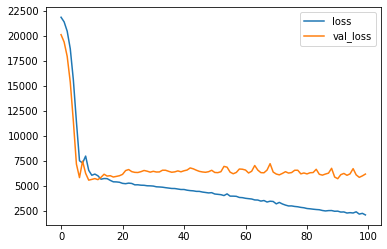

In [18]:
loss_df.plot()

##### 5.1.3. Avaliação do treinamento

In [19]:
from sklearn.metrics import mean_squared_error

In [ ]:
histogramas_real

array([[0.  , 0.  , 0.  , ..., 0.26, 0.41, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.04, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.03, 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.19, 0.48, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.46, 0.08, 0.  ]])

In [20]:
pred_params = modelo.predict(hist_teste)

In [21]:
pred_params

array([[ 8.10511857e-02,  2.21933675e+00,  1.29449415e+00,
         3.25923645e+02],
       [ 2.77345210e-01,  3.44556570e+00,  2.48333168e+00,
         4.74719086e+02],
       [ 1.33539177e-02,  7.08628893e-01,  2.42548019e-01,
         1.10085320e+02],
       [ 3.31131518e-02,  4.69750702e-01,  2.10608721e-01,
         6.40541306e+01],
       [ 2.87805468e-01,  2.16768026e+00,  1.23347950e+00,
         2.92209229e+02],
       [ 7.28610680e-02,  2.08469152e+00,  1.44437170e+00,
         3.01895294e+02],
       [-1.05037671e-02,  2.24877024e+00,  1.76842999e+00,
         3.75129883e+02],
       [-2.32450604e-01,  1.46400595e+00,  9.42828238e-01,
         2.68366058e+02],
       [-6.25816286e-02,  1.61584997e+00,  8.64635885e-01,
         2.52479004e+02],
       [ 1.80795282e-01,  2.72083950e+00,  1.93480361e+00,
         4.30870697e+02],
       [ 2.07557112e-01,  2.39925718e+00,  1.50485456e+00,
         3.56711639e+02],
       [ 1.77718714e-01,  1.55064034e+00,  1.03800964e+00,
      

In [22]:
parametros_pred = np.round(pred_params, 2)
parametros_pred

array([[ 8.0000e-02,  2.2200e+00,  1.2900e+00,  3.2592e+02],
       [ 2.8000e-01,  3.4500e+00,  2.4800e+00,  4.7472e+02],
       [ 1.0000e-02,  7.1000e-01,  2.4000e-01,  1.1009e+02],
       [ 3.0000e-02,  4.7000e-01,  2.1000e-01,  6.4050e+01],
       [ 2.9000e-01,  2.1700e+00,  1.2300e+00,  2.9221e+02],
       [ 7.0000e-02,  2.0800e+00,  1.4400e+00,  3.0190e+02],
       [-1.0000e-02,  2.2500e+00,  1.7700e+00,  3.7513e+02],
       [-2.3000e-01,  1.4600e+00,  9.4000e-01,  2.6837e+02],
       [-6.0000e-02,  1.6200e+00,  8.6000e-01,  2.5248e+02],
       [ 1.8000e-01,  2.7200e+00,  1.9300e+00,  4.3087e+02],
       [ 2.1000e-01,  2.4000e+00,  1.5000e+00,  3.5671e+02],
       [ 1.8000e-01,  1.5500e+00,  1.0400e+00,  1.9851e+02],
       [ 1.8000e-01,  1.6100e+00,  1.1000e+00,  2.6057e+02],
       [-5.0000e-02,  1.7500e+00,  1.1000e+00,  2.9392e+02],
       [ 2.4000e-01,  2.4700e+00,  1.5000e+00,  3.2388e+02],
       [ 4.0000e-02,  1.7600e+00,  1.1600e+00,  2.9247e+02],
       [ 2.9000e-01,  1.

In [23]:
df_parametros = pd.DataFrame(parametros_pred, columns=['gammaL_pred', 'gammaH_pred', 'c_pred', 'd0_pred'])
df_parametros

,gammaL_pred,gammaH_pred,c_pred,d0_pred
0,0.08,2.22,1.29,325.920013
1,0.28,3.45,2.48,474.720001
2,0.01,0.71,0.24,110.089996
3,0.03,0.47,0.21,64.050003
4,0.29,2.17,1.23,292.209991
5,0.07,2.08,1.44,301.899994
6,-0.01,2.25,1.77,375.130005
7,-0.23,1.46,0.94,268.369995
8,-0.06,1.62,0.86,252.479996
9,0.18,2.72,1.93,430.869995


Estão sendo gerados **números negativos** em $\gamma_{L}$.  Vamos corrigir substituindo pelo valor mínimo de $\gamma_{L}$(0,01):

In [24]:
df_parametros.loc[df_parametros['gammaL_pred'] <=0, 'gammaL_pred'] = 0.01

In [25]:
df_parametros['d0_pred'] = np.round(df_parametros.d0_pred, 0)
df_parametros.head()

,gammaL_pred,gammaH_pred,c_pred,d0_pred
0,0.08,2.22,1.29,326.0
1,0.28,3.45,2.48,475.0
2,0.01,0.71,0.24,110.0
3,0.03,0.47,0.21,64.0
4,0.29,2.17,1.23,292.0


In [26]:
parametros_pred = df_parametros.values
parametros_pred

array([[8.00e-02, 2.22e+00, 1.29e+00, 3.26e+02],
       [2.80e-01, 3.45e+00, 2.48e+00, 4.75e+02],
       [1.00e-02, 7.10e-01, 2.40e-01, 1.10e+02],
       [3.00e-02, 4.70e-01, 2.10e-01, 6.40e+01],
       [2.90e-01, 2.17e+00, 1.23e+00, 2.92e+02],
       [7.00e-02, 2.08e+00, 1.44e+00, 3.02e+02],
       [1.00e-02, 2.25e+00, 1.77e+00, 3.75e+02],
       [1.00e-02, 1.46e+00, 9.40e-01, 2.68e+02],
       [1.00e-02, 1.62e+00, 8.60e-01, 2.52e+02],
       [1.80e-01, 2.72e+00, 1.93e+00, 4.31e+02],
       [2.10e-01, 2.40e+00, 1.50e+00, 3.57e+02],
       [1.80e-01, 1.55e+00, 1.04e+00, 1.99e+02],
       [1.80e-01, 1.61e+00, 1.10e+00, 2.61e+02],
       [1.00e-02, 1.75e+00, 1.10e+00, 2.94e+02],
       [2.40e-01, 2.47e+00, 1.50e+00, 3.24e+02],
       [4.00e-02, 1.76e+00, 1.16e+00, 2.92e+02],
       [2.90e-01, 1.58e+00, 1.00e+00, 1.97e+02],
       [1.00e-02, 1.07e+00, 5.60e-01, 2.28e+02],
       [1.00e-02, 7.50e-01, 3.90e-01, 1.38e+02],
       [1.00e-02, 9.30e-01, 3.30e-01, 1.65e+02],
       [1.10e-01, 1.

In [27]:
mean_squared_error(parametros_teste, parametros_pred)

6184.281169442508

##### 5.1.4. Ajustes no modelo

Vamos ajustar o modelo utilizando `EarlyStopping` e `Dropout`:

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [29]:
modelo = Sequential()
modelo.add(Dense(units=256, activation='relu'))

modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(units=4))

modelo.compile(optimizer='adam', loss='mse')

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

In [31]:
modelo.fit(
    x=hist_treino, 
    y=parametros_treino, 
    epochs=1000, 
    verbose=1,
    validation_data = (hist_teste, parametros_teste),
    callbacks=[early_stop])

Epoch 1/1000
4/4 [==============================] - 1s 43ms/step - loss: 21872.3613 - val_loss: 20176.1230
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 21510.9336 - val_loss: 19557.0527
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 20707.4980 - val_loss: 18256.5918
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 18975.0762 - val_loss: 15876.8037
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 16372.6885 - val_loss: 12195.8848
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 12325.2188 - val_loss: 7908.0327
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 8861.1553 - val_loss: 5706.7100
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 7847.3037 - val_loss: 6425.4194
Epoch 9/1000
4/4 [==============================] - 0s 9ms/step - loss: 8506.8848 - val_loss: 6012.5098
Epoch 10/1000
4/4 [==========================

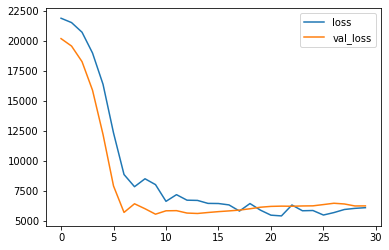

In [32]:
losses = pd.DataFrame(modelo.history.history)
losses.plot()

In [33]:
pred_params = modelo.predict(hist_teste)

In [36]:
parametros_pred = np.round(pred_params, 2)
parametros_pred

array([[-5.5000e-01,  2.4100e+00,  3.6600e+00,  2.2007e+02],
       [-4.7000e-01,  1.9300e+00,  3.3800e+00,  2.0016e+02],
       [-3.9000e-01,  1.6400e+00,  2.7500e+00,  1.6030e+02],
       [-4.1000e-01,  1.1100e+00,  1.8800e+00,  1.1029e+02],
       [-4.8000e-01,  2.2600e+00,  3.4900e+00,  2.0717e+02],
       [-6.4000e-01,  1.8700e+00,  3.0700e+00,  1.8741e+02],
       [-1.1100e+00,  2.7400e+00,  4.8800e+00,  2.9077e+02],
       [-7.5000e-01,  3.1400e+00,  5.4900e+00,  3.0802e+02],
       [-6.7000e-01,  2.4900e+00,  3.9100e+00,  2.3553e+02],
       [-1.4800e+00,  3.8900e+00,  6.3600e+00,  3.8082e+02],
       [-6.5000e-01,  2.7700e+00,  4.3300e+00,  2.5679e+02],
       [-6.0000e-02,  8.5000e-01,  1.4300e+00,  7.9430e+01],
       [-1.2000e+00,  2.8500e+00,  4.9800e+00,  2.9802e+02],
       [-9.5000e-01,  2.9900e+00,  4.7500e+00,  2.9018e+02],
       [-4.4000e-01,  2.0700e+00,  3.1700e+00,  1.8970e+02],
       [-7.3000e-01,  2.2600e+00,  3.6400e+00,  2.2277e+02],
       [-4.0000e-02,  1.

In [35]:
mean_squared_error(parametros_teste, pred_params)

6248.772399496549

### 5.2. $\gamma_{L}$

##### 5.2.1. Criação do modelo 

In [37]:
modelo = Sequential()
modelo.add(Dense(units=256, activation='relu'))
modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dense(units=1))

modelo.compile(optimizer='adam', loss='mse')

##### 5.2.2.  Treinamento

In [38]:
hist_treino, hist_teste, gammaL_treino, gammaL_teste = train_test_split(histogramas, gammaL, test_size=0.3, random_state=1618)

In [39]:
modelo.fit(
    x=hist_treino,
    y=gammaL_treino,
    epochs=100,
    verbose=0,
    validation_data=(hist_teste, gammaL_teste)
)

##### 5.2.3.  Gráfico do treinamento

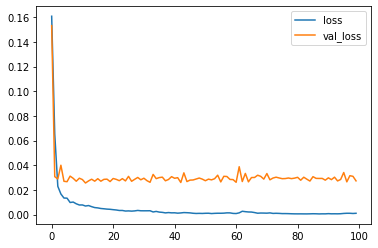

In [40]:
losses_gammaL = pd.DataFrame(modelo.history.history)
losses_gammaL.plot()



Vê-se claramente a diferença entre o **conjunto de treinamento** e o **conjunto de teste**.  Vamos tentar resolver este problema com as seguintes estratégias:

a). Redução da capacidade da rede retirando 1 camada escondida do modelo:

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=256, activation='relu'))
modelo.add(Dense(units=173, activation='relu'))
#modelo.add(Dense(units=25, activation='relu'))
modelo.add(Dense(units=1))

modelo.compile(optimizer='adam', loss='mse')

In [41]:
hist_treino, hist_teste, gammaL_treino, gammaL_teste = train_test_split(histogramas, gammaL, test_size=0.3, random_state=1618)

In [42]:
modelo.fit(
    x=hist_treino,
    y=gammaL_treino,
    epochs=100,
    verbose=0,
    validation_data=(hist_teste, gammaL_teste)
)

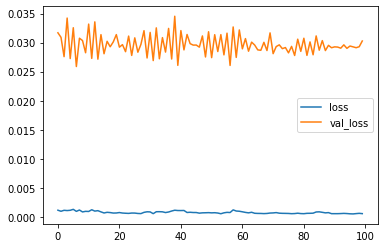

In [43]:
losses_gammaL = pd.DataFrame(modelo.history.history)
losses_gammaL.plot()

b)  Usando `Dropout` e `EarlyStopping`:

In [58]:
modelo = Sequential()
modelo.add(Dense(units=256, activation='relu'))
#modelo.add(Dropout(0.5))

modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(units=173, activation='relu'))
modelo.add(Dropout(0.7))

modelo.add(Dense(units=1))

modelo.compile(optimizer='adam', loss='mse')

In [59]:
early_stop_gammaL = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [60]:
hist_treino, hist_teste, gammaL_treino, gammaL_teste = train_test_split(histogramas, gammaL, test_size=0.3, random_state=1618)

In [61]:
modelo.fit(
    x=hist_treino,
    y=gammaL_treino,
    epochs=200,
    verbose=0,
    validation_data=(hist_teste, gammaL_teste),
    callbacks=[early_stop_gammaL]
)

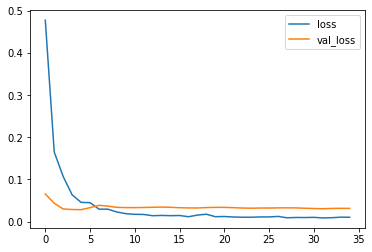

In [62]:
losses_gammaL = pd.DataFrame(modelo.history.history)
losses_gammaL.plot()

##### 5.2.4.  Avaliação do Treinamento

In [63]:
pred_gammaL = modelo.predict(hist_teste)
pred_gammaL.shape

(45, 1)

In [64]:
gammaL_teste

array([0.1 , 0.31, 0.24, 0.11, 0.11, 0.13, 0.06, 0.09, 0.21, 0.11, 0.42,
       0.07, 0.13, 0.13, 0.12, 0.08, 0.1 , 0.13, 0.01, 0.07, 0.09, 0.1 ,
       0.03, 0.05, 0.19, 0.04, 0.31, 0.07, 0.27, 0.23, 0.06, 0.2 , 0.07,
       0.04, 0.03, 0.88, 0.15, 0.02, 0.04, 0.71, 0.46, 0.02, 0.21, 0.12,
       0.04])

In [65]:
pred_gammaL = np.round(pred_gammaL, 2).reshape(45,)
pred_gammaL

array([0.1 , 0.11, 0.09, 0.11, 0.12, 0.11, 0.08, 0.09, 0.13, 0.12, 0.11,
       0.09, 0.11, 0.11, 0.1 , 0.08, 0.11, 0.09, 0.12, 0.08, 0.1 , 0.11,
       0.09, 0.07, 0.1 , 0.09, 0.16, 0.09, 0.07, 0.14, 0.11, 0.1 , 0.09,
       0.08, 0.11, 0.12, 0.09, 0.08, 0.12, 0.11, 0.08, 0.1 , 0.1 , 0.11,
       0.08], dtype=float32)

In [66]:
mean_squared_error(gammaL_teste, pred_gammaL)

0.031200000117619833

### 5.3. $\gamma_{H}$

##### 5.3.1. Criação do modelo

In [115]:
modelo_gammaH = Sequential()
modelo_gammaH.add(Dense(units=256, activation='relu'))

modelo_gammaH.add(Dense(units=173, activation='relu'))
modelo_gammaH.add(Dropout(0.5))

modelo_gammaH.add(Dense(units=173, activation='relu'))
modelo_gammaH.add(Dropout(0.2))

modelo_gammaH.add(Dense(units=1))

modelo_gammaH.compile(optimizer='adam', loss='mse')

In [116]:
early_stop_gammaH = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [117]:
hist_treino, hist_teste, gammaH_treino, gammaH_teste = train_test_split(histogramas, gammaH, test_size=0.3, random_state=1618)

##### 5.3.2. Treinamento

In [118]:
modelo_gammaH.fit(
    x=hist_treino,
    y=gammaH_treino,
    epochs=300,
    verbose=0,
    validation_data=(hist_teste, gammaH_teste),
    #callbacks=[early_stop_gammaH]
)

##### 5.3.3. Gráfico do Treinamento

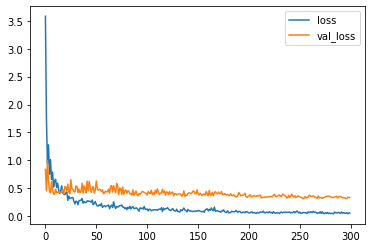

In [119]:
losses_gammaH = pd.DataFrame(modelo_gammaH.history.history)
losses_gammaH.plot()

##### 5.3.4.  Avaliação do Treinamento

In [120]:
pred_gammaH = modelo_gammaH.predict(hist_teste)
pred_gammaH = pred_gammaH.reshape(45,)
pred_gammaH.shape

(45,)

In [121]:
gammaH_teste.shape

(45,)

In [123]:
mean_squared_error(gammaH_teste, pred_gammaH)

0.33389843732494734